# Explore weather data

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

In [2]:
weather_data_file = '../data/weather_data/ny_jfk_weather.csv'
june_18_weather_data_file = '../data/weather_data/ny_jfk_weather_2018-06.csv'

In [3]:
weather_data = pd.read_csv(weather_data_file, sep=',')
weather_data.head(10)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,SNOW,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08,WT09
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-01,5.5,NaN,13.5,0.0,...,180.0,11.2,14.3,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-02,4.5,NaN,0.0,0.0,...,180.0,8.9,11.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-03,3.5,NaN,0.0,0.0,...,220.0,8.9,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-04,2.9,NaN,0.0,0.0,...,30.0,7.2,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-05,4.0,NaN,0.0,0.0,...,130.0,7.6,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-06,3.7,NaN,0.0,0.0,...,110.0,6.3,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-07,4.0,NaN,48.8,0.0,...,300.0,11.6,13.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-08,4.9,NaN,0.0,0.0,...,260.0,10.7,12.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-09,5.1,NaN,0.0,0.0,...,190.0,8.9,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.6386,-73.7622,3.4,2017-07-10,5.7,NaN,0.0,0.0,...,180.0,12.5,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather_data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5',
       'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'WT09'],
      dtype='object')

In [5]:
weather_data.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
                           'PGTM', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 
                           'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 
                           'WT08', 'WT09'], inplace=True)

### Graph weather over the sample period

Text(0.5,1,'Snow')

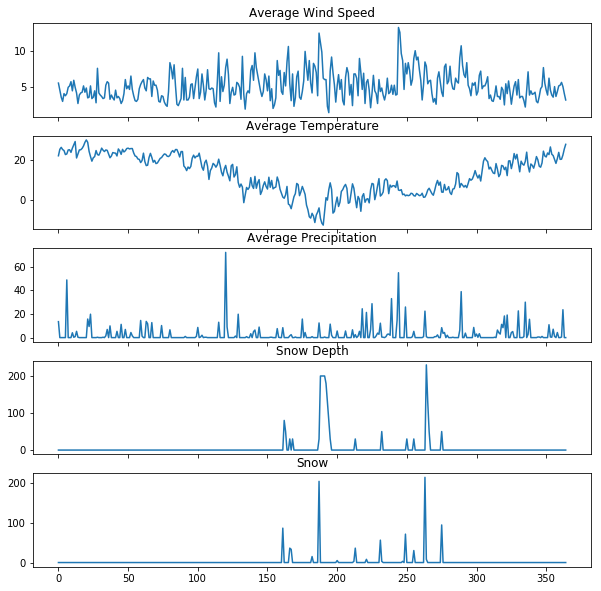

In [7]:
f, axarr = plt.subplots(5, sharex=True, figsize=(10, 10))
axarr[0].plot(weather_data.AWND)
axarr[0].set_title('Average Wind Speed')
axarr[1].plot(weather_data.TAVG)
axarr[1].set_title('Average Temperature')
axarr[2].plot(weather_data.PRCP)
axarr[2].set_title('Average Precipitation')
axarr[3].plot(weather_data.SNWD)
axarr[3].set_title('Snow Depth')
axarr[4].plot(weather_data.SNOW)
axarr[4].set_title('Snow')

### Create weather meta-data

In [8]:
months = []
for i, weather in weather_data.iterrows():
    month = str(datetime.strptime(weather.DATE, '%Y-%m-%d').strftime('%m'))
    months.append(month)
weather_data['month'] = months
weather_data.head(10)

,DATE,AWND,PRCP,SNOW,SNWD,TAVG,month
0,2017-07-01,5.5,13.5,0.0,0.0,22.0,07
1,2017-07-02,4.5,0.0,0.0,0.0,25.2,07
2,2017-07-03,3.5,0.0,0.0,0.0,26.2,07
3,2017-07-04,2.9,0.0,0.0,0.0,25.1,07
4,2017-07-05,4.0,0.0,0.0,0.0,24.6,07
5,2017-07-06,3.7,0.0,0.0,0.0,22.6,07
6,2017-07-07,4.0,48.8,0.0,0.0,22.9,07
7,2017-07-08,4.9,0.0,0.0,0.0,24.9,07
8,2017-07-09,5.1,0.0,0.0,0.0,25.0,07
9,2017-07-10,5.7,0.0,0.0,0.0,23.7,07


In [9]:
weather_meta = pd.DataFrame()
for month in weather_data.month.unique():
    min_temp = weather_data[weather_data.month == month].TAVG.min()
    max_temp = weather_data[weather_data.month == month].TAVG.max()
    mean_temp = weather_data[weather_data.month == month].TAVG.mean()
    min_wind = weather_data[weather_data.month == month].AWND.min()
    max_wind = weather_data[weather_data.month == month].AWND.max()
    mean_wind = weather_data[weather_data.month == month].AWND.mean()
    min_prcp = weather_data[weather_data.month == month].PRCP.min()
    max_prcp = weather_data[weather_data.month == month].PRCP.max()
    mean_prcp = weather_data[weather_data.month == month].PRCP.mean()
    min_snwd = weather_data[weather_data.month == month].SNWD.min()
    max_snwd = weather_data[weather_data.month == month].SNWD.max()
    mean_snwd = weather_data[weather_data.month == month].SNWD.mean()
    min_snow = weather_data[weather_data.month == month].SNOW.min()
    max_snow = weather_data[weather_data.month == month].SNOW.max()
    mean_snow = weather_data[weather_data.month == month].SNOW.mean()
    weather_meta = weather_meta.append({
        'month': month,
        'min_temp': min_temp,
        'max_temp': max_temp,
        'mean_temp': mean_temp,
        'min_wind': min_wind,
        'max_wind': max_wind,
        'mean_wind': mean_wind,
        'min_prcp': min_prcp,
        'max_prcp': max_prcp,
        'mean_prcp': mean_prcp,
        'min_snwd': min_snwd,
        'max_snwd': max_snwd,
        'mean_snwd': mean_snwd,
        'min_snow': min_snow,
        'max_snow': max_snow,
        'mean_snow': mean_snow
    }, ignore_index=True)

In [10]:
weather_meta.set_index('month')

,max_prcp,max_snow,max_snwd,max_temp,max_wind,mean_prcp,mean_snow,mean_snwd,mean_temp,mean_wind,min_prcp,min_snow,min_snwd,min_temp,min_wind
month,,,,,,,,,,,,,,,
07,48.8,0.0,0.0,29.9,7.6,3.816129,0.000000,0.000000,24.490323,4.300000,0.0,0.0,0.0,19.3,2.6
08,14.5,0.0,0.0,25.8,6.5,2.051613,0.000000,0.000000,23.396774,4.212903,0.0,0.0,0.0,18.6,2.6
09,13.7,0.0,0.0,25.1,8.4,1.863333,0.000000,0.000000,21.236667,4.663333,0.0,0.0,0.0,16.1,2.2
10,72.1,0.0,0.0,23.3,9.8,3.448387,0.000000,0.000000,17.164516,5.100000,0.0,0.0,0.0,10.2,2.1
11,19.8,0.0,0.0,17.7,9.8,1.530000,0.000000,0.000000,8.193333,5.193333,0.0,0.0,0.0,-1.4,1.8
12,15.7,86.0,80.0,11.4,10.7,1.351613,5.483871,6.129032,1.906452,5.677419,0.0,0.0,0.0,-9.1,1.9
01,12.4,203.0,200.0,8.5,12.6,1.503226,7.967742,41.290323,-0.816129,5.980645,0.0,0.0,0.0,-12.6,1.3
02,33.0,56.0,50.0,10.6,9.0,5.378571,2.392857,1.785714,4.164286,4.714286,0.0,0.0,0.0,-5.7,2.0
03,54.9,213.0,230.0,9.7,13.4,4.170968,10.483871,15.161290,3.806452,6.877419,0.0,0.0,0.0,1.3,2.5


* Save weather meta-data for later

In [11]:
pickle.dump(weather_meta, open('../data/weather_data/weather_meta.p', "wb"))

### Extract June 18 data

In [14]:
weather_data_june_18 = weather_data[weather_data['month'].isin(['05', '06', '07', '08'])]
weather_data_june_18

,DATE,AWND,PRCP,SNOW,SNWD,TAVG,month
0,2017-07-01,5.5,13.5,0.0,0.0,22.0,07
1,2017-07-02,4.5,0.0,0.0,0.0,25.2,07
2,2017-07-03,3.5,0.0,0.0,0.0,26.2,07
3,2017-07-04,2.9,0.0,0.0,0.0,25.1,07
4,2017-07-05,4.0,0.0,0.0,0.0,24.6,07
5,2017-07-06,3.7,0.0,0.0,0.0,22.6,07
6,2017-07-07,4.0,48.8,0.0,0.0,22.9,07
7,2017-07-08,4.9,0.0,0.0,0.0,24.9,07
8,2017-07-09,5.1,0.0,0.0,0.0,25.0,07
9,2017-07-10,5.7,0.0,0.0,0.0,23.7,07


In [ ]:
weather_data_june_18.to_csv(june_18_weather_data_file)